In [1]:
import math as m

def watts_to_dBm(watts:float)->float:
    ''' Convertir potencia de Watts en dBm. ''' 
    return round(10 * m.log10(watts/0.001))

def watts_to_dB(watts:float)->float:
    ''' Convertir potencia de Watts en dB. ''' 
    return round(10 * m.log10(watts))

def snr(signal:float, noise:float)->float:
    ''' Calcular snr de dos potencias en dB. ''' 
    return round(10 * watts_to_dB(signal/noise))

def dB_to_watts(decibelios:float)->float:
    ''' Calcular snr de dos potencias en dB. ''' 
    return round(100 / 10**(decibelios/10))


In [5]:
1*10**(45/10)

31622.776601683792

In [36]:
20 * m.log10(70.7/100)

-3.011611724062011

In [35]:
dB_to_watts(-3)

200

In [50]:
pos_x=300
pos_y=37.4

salto_y=(1565.7-579.13)/40
salto_x=(2276.62-1195.46)/300

y=round(1565.7-(pos_y*salto_y), 2)
x=round(1195.46+(pos_x*salto_x), 2)

print(f"(x,y)=({x}, {y})")


(x,y)=(2276.62, 643.26)


In [51]:
10e-12*10**(40/10)

1e-07

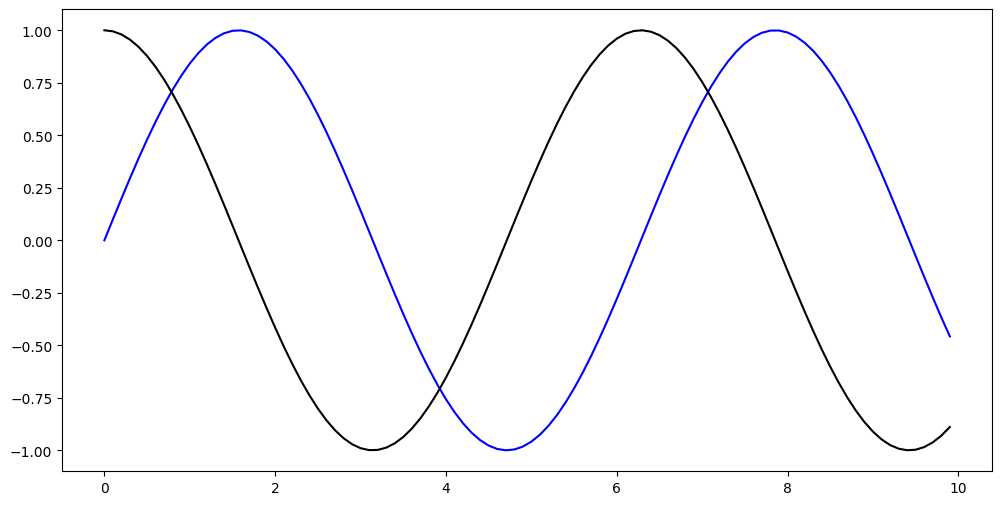

In [18]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(12, 6))

x = np.arange(0, 10, 0.1)
y = np.sin(x)
z = np.cos(x)

ax.plot(x, y, color='blue', label='Sine wave')
ax.plot(x, z, color='black', label='Cosine wave')

plt.show()



In [31]:
def plotSpectrum(y,Fs):
    """ Gráfica la amplitud del espectro de y(t) """
    n = len(y) # longitud de la señal
    k = np.arange(n)
    T = n/Fs
    frq = k/T # 2 lados del rango de frecuencia
    frq = frq[range(int(n/2))] # Un lado del rango de frecuencia
    Y = np.fft.fft(y)/n # fft calcula la normalización
    Y = Y[range(int(n/2))]
    plt.plot(frq,abs(Y),'r') # gráfica el espectro de frecuencia
    plt.xlabel('Frecuencia (Hz)')
    plt.ylabel('|Y(f)|')

def plotSpectrum2(y,Fs):
    """ Gráfica la amplitud del espectro de y(t) """
    n = len(y) # longitud de la señal
    k = np.arange(n)
    T = n/Fs
    frq = k/T # 2 lados del rango de frecuencia
    Y = np.fft.fft(y)/n # fft calcula la normalización
    plt.plot(frq,abs(Y),'r') # gráfica el espectro de frecuencia
    plt.xlabel('Frecuencia (Hz)')
    plt.ylabel('|Y(f)|')

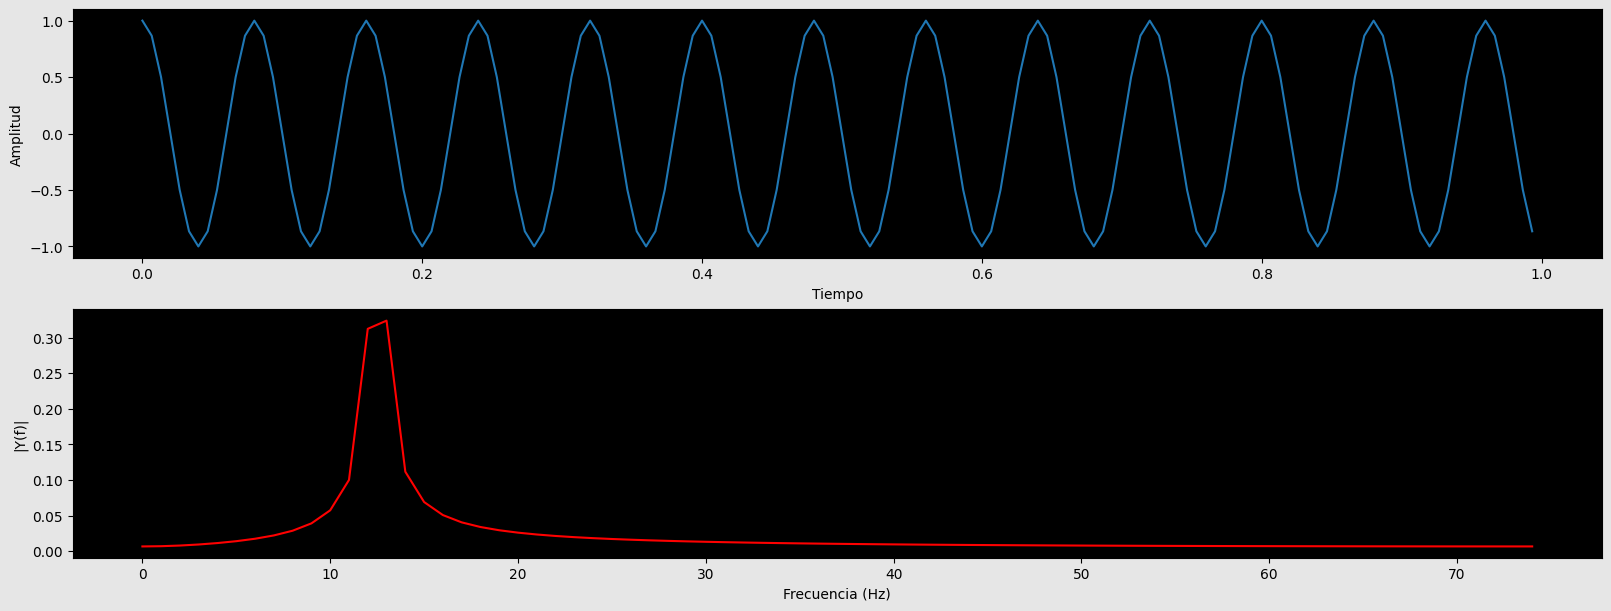

In [64]:
Fs = 150.0;            # rata de muestreo
Ts = 1.0/Fs;            # intervalo de muestreo
t = np.arange(0,1,Ts)   # vector tiempo
f = 12.5;                 # frecuencia de la señal
w = 2*np.pi*f
y = np.cos(w*t)

#Proceso de gráficas la señal
fig = plt.figure(layout="constrained",facecolor='0.9', figsize=(16,6))
plt.rcParams['axes.facecolor']='black'



plt.subplot(2,1,1)
plt.plot(t,y)
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.subplot(2,1,2)

#Se llama a la función con la señal y la rata de muestreo
plotSpectrum(y,Fs)
plt.show()